# Task 1: import packages and load data

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Prompt the user to enter the file path correctly
path = input('Enter the file path (e.g., sales2019_1.csv): ')

# Check if the file exists
if os.path.exists(path):
    df = pd.read_csv(path)
    print(df)
else:
    print(f"File not found: {path}")


      Order ID                     Product Quantity Ordered Price Each  \
0       162009                      iPhone                1        700   
1       162009    Lightning Charging Cable                1      14.95   
2       162009            Wired Headphones                2      11.99   
3       162010  Bose SoundSport Headphones                1      99.99   
4       162011      34in Ultrawide Monitor                1     379.99   
...        ...                         ...              ...        ...   
15221   176554    Lightning Charging Cable                1      14.95   
15222   176555            27in FHD Monitor                1     149.99   
15223   176556      AAA Batteries (4-pack)                3       2.99   
15224   176557                      iPhone                1        700   
15225   176557    Lightning Charging Cable                1      14.95   

           Order Date                           Purchase Address  
0      03/28/19 20:59            942 Church 

# Task 2: Clean and preprocess data

## Task 2.1: Merge 12-month data

In [3]:
path = 'D:/Documents/VSCode/Sales Analysis/'
frames = []
all_length = []
for file in os.listdir(path):
    if file.endswith('csv'):
        filepath = path + file
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)

result.to_csv('annualSales2019.csv', index = False)

## Định nghĩa lại df = pd.read_csv('annualSales2019.csv')

In [9]:
df = pd.read_csv('annualSales2019.csv')
print(df)
# Display the first few rows of the DataFrame

       Order ID                   Product Quantity Ordered Price Each  \
0        141234                    iPhone                1        700   
1        141235  Lightning Charging Cable                1      14.95   
2        141236          Wired Headphones                2      11.99   
3        141237          27in FHD Monitor                1     149.99   
4        141238          Wired Headphones                1      11.99   
...         ...                       ...              ...        ...   
373695   259353    AAA Batteries (4-pack)                3       2.99   
373696   259354                    iPhone                1        700   
373697   259355                    iPhone                1        700   
373698   259356    34in Ultrawide Monitor                1     379.99   
373699   259357      USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       01/22/19 21:25          944 Walnut St, Boston, MA

## Task 2.2: Add month column

In [10]:
df["Month"] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


## Task 2.3: Get rid of 'NaN' and 'Or' value

In [11]:
df = df.dropna(how='all')
df = df[df['Month'] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


# Task 3: Reporting

## Task 3.1: What was the best month for sales? How much was earned that month ?

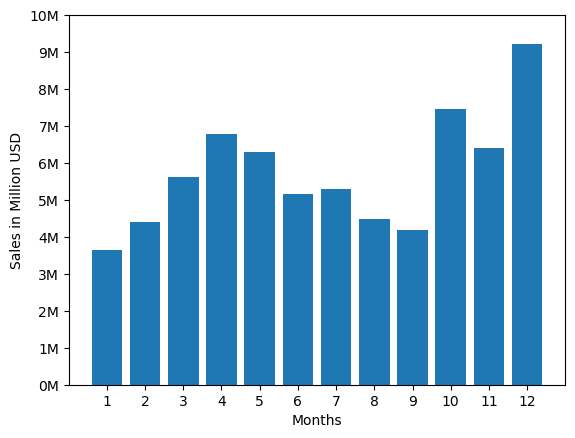

In [15]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], downcast='float')
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
moving_column = df.pop('Sales')
df.insert(4, 'Sales', moving_column)
sales_value = df.groupby('Month').sum()['Sales']
months = range(1,13)

plt.bar(x=months, height=sales_value)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in Million USD')
plt.yticks([i * 1e6 for i in range(0, 11)], [f'{i}M' for i in range(0, 11)])
plt.show()

## Task 3.2: What city has the best sales?

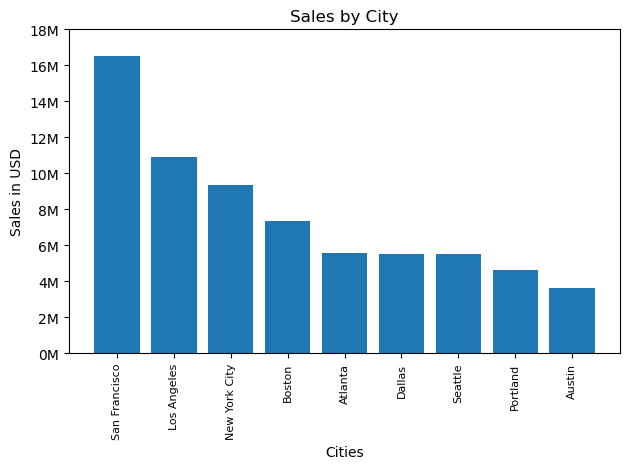

In [24]:
address_to_city = lambda address: address.split(',')[1].strip()
df['City'] = df['Purchase Address'].apply(address_to_city)

# CHỈ nhóm và tính tổng cột 'Sales' – KHÔNG để nó gom cả datetime
sales_value_city = df.groupby('City')['Sales'].sum().sort_values(ascending=False)
cities = sales_value_city.index

plt.bar(x=cities, height=sales_value_city)
plt.xticks(cities, rotation=90, size=8)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.yticks([i * 1e6 for i in range(0, 19, 2)], [f'{i}M' for i in range(0, 19, 2)])  # 0M đến 18M
plt.title('Sales by City')
plt.tight_layout()
plt.show()


## Task 3.3: What time should we display ads to maximize the likelihood of customer's buying product?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3508\3110561419.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


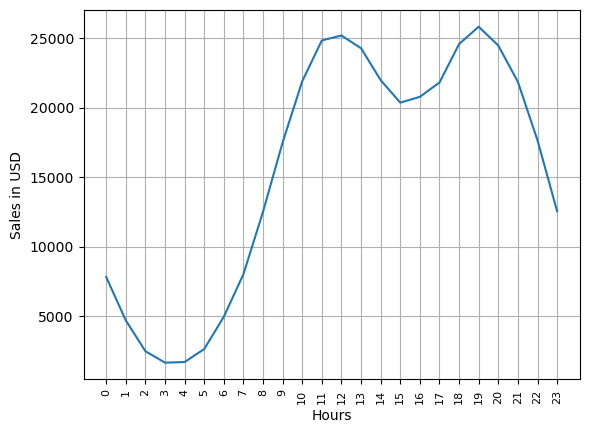

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.show()

## Task 3.4: What products are most often sold together?

In [19]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

All Products
Lightning Charging Cable, Lightning Charging Cable        19831
AAA Batteries (4-pack), AAA Batteries (4-pack)            19826
AA Batteries (4-pack), AA Batteries (4-pack)              19809
USB-C Charging Cable, USB-C Charging Cable                19792
Wired Headphones, Wired Headphones                        17208
Apple Airpods Headphones, Apple Airpods Headphones        14575
Bose SoundSport Headphones, Bose SoundSport Headphones    12505
27in FHD Monitor, 27in FHD Monitor                         7213
27in 4K Gaming Monitor, 27in 4K Gaming Monitor             5979
34in Ultrawide Monitor, 34in Ultrawide Monitor             5935
Name: count, dtype: int64

## Task 3.5: What product sold the most? Why do you think is sold the most?

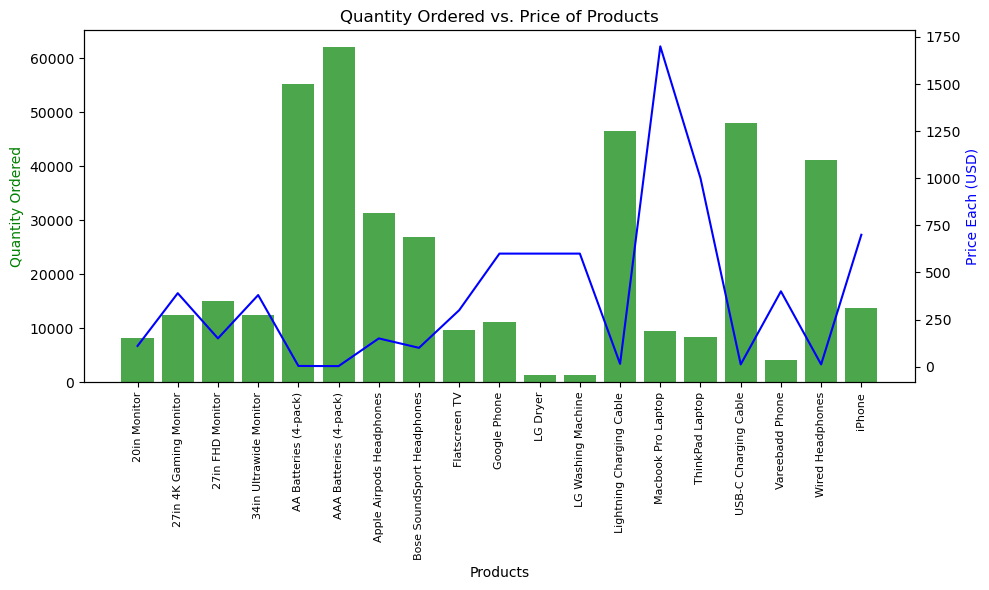

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Bước 1: Loại bỏ các hàng không hợp lệ
df = df.dropna(subset=['Quantity Ordered', 'Price Each', 'Product'])

# Bước 2: Chuyển đổi các cột cần thiết sang kiểu dữ liệu số
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce', downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce', downcast='float')

# Bước 3: Đảm bảo không còn giá trị null sau khi chuyển đổi
df = df.dropna(subset=['Quantity Ordered', 'Price Each'])

# Bước 4: Nhóm dữ liệu theo sản phẩm và tính tổng 'Quantity Ordered' cũng như giá trung bình 'Price Each'
all_products = df.groupby('Product').sum(numeric_only=True)['Quantity Ordered']
prices = df.groupby('Product').mean(numeric_only=True)['Price Each']

# Bước 5: Chuẩn bị danh sách các sản phẩm
products_ls = all_products.index.tolist()

# Bước 6: Chuẩn bị dữ liệu cho biểu đồ
x = products_ls
y1 = all_products.values
y2 = prices.values

# Bước 7: Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=(10, 6))  # Điều chỉnh kích thước biểu đồ

# Biểu đồ cột cho số lượng sản phẩm được đặt hàng
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g', alpha=0.7, label='Quantity Ordered')
ax2.plot(x, y2, 'b-', label='Price Each')

# Thiết lập trục và nhãn
ax1.set_xticks(range(len(products_ls)))
ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each (USD)', color='b')
ax1.set_title('Quantity Ordered vs. Price of Products')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


In [26]:
# Sau khi xử lý và làm sạch xong:
# (df là DataFrame chứa dữ liệu đã xử lý đầy đủ)

df.to_csv('annualSales2019_cleaned.csv', index=False)
